<a href="https://colab.research.google.com/github/tuntunwinkic/mliot/blob/master/ctl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ဒါတွေလုပ်ဖို့ အရင်ဆုံး google account တစ်ခုနဲ့ Google Colab ကို သုံးတတ်ဖို့ လိုပါတယ် 

ပထမဦး ဆုံး dataset ဆောက်မှာ ဖြစ်ပါတယ် ကြောင်နဲ့ မျိုးနွယ်တူ တွေ ဖြစ်တဲ့ ကျား ကြောင် ခြင်သေ့ သုံးမျိုးကို ခွဲခြားပေးနိုင်တဲ့ classifier ဆောက်ပေးမှာ ဖြစ်ပါတယ် အဲ့လို ဆောက်ဖို့အတွက် images.google.com ကို သွားပြီး ကိုယ်လိုတဲ့ ပုံတွေကို စုဆောင်းမှာ ဖြစ်ပါတယ်


Google images Search မှာ ကိုယ်လိုချင်တဲ့ အကောင်ကို ရိုက်ထည့်ပြီး ရှာပါမယ် ဥပမာ tiger ကိုရှာဖို့ ရိုက်ထည့်ပါမယ် 


ပြီးရင် အဲ့ ပေ့ချ်မှာပဲ Ctrl+Shift+J နှိပ်မှာ ဖြစ်ပါတယ် ဒါဆိုရင် javascript console ပေါ်လာမှာ ဖြစ်ပါတယ် အဲ့ console ထဲမှာ 

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));


ဒီစာကြောင်းကို ကော်ပီကူးထည့်ပါမယ်
ပြီးရင် Enter နှိပ်ပါမယ် ဒါဆိုရင် ကျားပုံတွေရဲ့ link တွေ ကျလာပါလိမ့် အဲ့ဒါတွေကို tiger.csv ဆိုပြီး နာမည်ပြောင်းပြီး သိမ်းမှာ ဖြစ်ပါတယ်


ထို့အတူပဲ ကြောင်အတွက် cat.csv ခြင်သေ့အတွက် lion.csv ဖိုင်တွေ သွားသိမ်းမှာ ဖြစ်ပါတယ်


In [0]:
from fastai.vision import *


လက်ရှိမှာ fastai က 


1.   Computer Vision
2.   Natural Language Text
3.   Tabular Data
4.   Collaborative ဆိုပြီး လေးမျိုး support ပေးထားပါတယ်

အခုက computer vision ကို သုံးမှာမို့လို့ vision ကို import လုပ်ထားပါတယ်











In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'mlworkshop/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


ဒီဟာကတော့ Google Colab မှာ သုံးဖို့ google drive ကို mount လုပ်တာ ဖြစ်ပါတယ် အထက်ပါ ကုဒ်ကို run လိုက်ရင် https://accounts ဆိုတဲ့ လင့် ကျလာပါလိမ့်မယ် အဲ့လင့်ကို ကလစ်ပြီး ကိုယ့် gdrive ကို သုံးဖို့အတွက် allow လုပ်ပေးရမှာ ဖြစ်ပါတယ် နောက်ပြီး ကိုယ့် google drive ထဲမှာ mlworkshop ဆိုတဲ့ ဖိုလ်ဒါ တစ်ခု သွားဆောက်ထားရမှာ ဖြစ်ပါတယ်

In [0]:
folder = 'cat'
file = 'cat.csv'

In [0]:
folder = 'tiger'
file = 'tiger.csv'

In [0]:
folder = 'lion'
file = 'lion.csv'

အပေါ်က ဆဲ သုံးခုကို တစ်ခုခြင်းစီ run မှာပါ ပထမဦးဆုံး ကြောင်ပါတဲ့ ဆဲကို run ပါမယ် folder နဲ့ file variable တွေကို နာမယ်ပေးခဲ့တာ ပါ

ဒါပြီးရင် ကျားနဲ့ ခြင်သေ့ကို မ run သေးပါဘူး

In [0]:
path = Path(base_dir + 'data/animal') # base_dir နဲ့ 'data/animal' ပေါင်းထည့်လိုက်တယ် ပြီးရင် Path ထဲ အဖြစ်ဖန်တီးပါတယ်
dest = path/folder # dest ထဲကို /content/gdrive/My Drive/mlworkshop/data/animal/ နဲ့ folder ပေါင်းထည့်ရပါမယ် ခုအချိန်မှာ folder နာမည်က  cat ဖြစ်ပါတယ်
dest.mkdir(parents=True, exist_ok=True) # dest ထဲမှာ ရှိတဲ့အတိုင်း ဖိုလ်ဒါ ဆောက်ပါတယ် အဲ့ဒီတော့ data ရဲ့အောက် animal/cat ဖိုလ်ဒါတွေ ရှိလာပါမယ်

In [9]:
path

PosixPath('/content/gdrive/My Drive/mlworkshop/data/animal')

In [30]:
dest

PosixPath('/content/gdrive/My Drive/mlworkshop/data/animal/lion')

ခု Google drive ထဲကို ကြည့်ပါမယ်

ပြီးရင် အပေါ်က ဆဲကို run ပါမယ် base_dir ကို 'data/animal' ဆိုတာနဲ့ ပေါင်းထည့်ပါတယ် 



In [31]:
print(path)
print(path/file) 
# ဒုတိယ လိုင်းက path နဲ့ file ကို ပေါင်းထားတာပါ path ထဲမှာ /content/gdrive/My Drive/mlworkshop/data/animal ရှိပါတယ် 
# file ထဲမှာ cat.csv ရှိပါတယ်

/content/gdrive/My Drive/mlworkshop/data/animal
/content/gdrive/My Drive/mlworkshop/data/animal/lion.csv


In [38]:
download_images(path/file, dest, max_pics=200)


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

ခု ပုံတွေကို ဒေါင်းလုပ် လုပ်မှာ ဖြစ်ပါတယ် ဒေါင်းလုပ်ပြီး သွားထားမယ့် နေရာက dest ထဲမှာ ဖြစ်ပါတယ် ပုံတွေရဲ့ link တွေကိုတော့ path/file က ပြတဲ့ နေရာထဲမှာ ထည့်ထားမှာ ဖြစ်ပါတယ် ဖိုင်က animal folder အောက်မှာ ရှိရမှာပါ ခု မရှိသေးပါဘူး ဒါကြောင့် upload လုပ်ပါမယ်

ကြောင်အတွက်ပြီးရင် ကျားအတွက် ခြင်သေ့အတွက် ခုနက အဆင့်တွေ အတိုင်း လုပ်ပါမယ်

In [0]:
classes = ['cat','tiger','lion']


classes ဆိုတဲ့ array ထဲကို ခုနက အကောင် သုံးကောင်ကို ထည့်ထားတာပါ

In [11]:
path

PosixPath('/content/gdrive/My Drive/mlworkshop/data/animal')

In [12]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cat


tiger


lion


classes ထဲမှာ အကောင်သုံးကောင် ရှိပါတယ် အဲ့ အကောင်သုံးကောင်ကို for loop နဲ့ ပတ်ပြီး ထုတ်ပါတယ် ပြီးတော့  path ထဲမှာ ရှိတဲ့ လမ်းကြောင်းနဲ့  တခါချင်းစီထွက်လာတဲ့ အကောင်နဲ့ ပေါင်းတဲ့အခါ cat,lion,tiger တို့ရဲ့ folder path တွေကို ရပါတယ် အဲ့ဒီ folder တစ်ခုချင်းစီမှာ ပုံတွေ ရှိသလား ရှိတဲ့ ပုံတွေက ပျက်နေလား ကို စစ်ပါတယ် ပျက်ရင် ဖျက်ပါတယ် 

In [0]:
verify_images?? # သူ့ source code ကို ကြည့်ချင်ရင်ပါ

In [43]:
doc(verify_images) # သူ့ရဲ့ documentation ကို ကြည့်ချင်ရင်ပါ

In [0]:

np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

train data နဲ့ validation data ခွဲမှာပါ path ထဲက dataset ကို ယူမှာပါ path ထဲမှာ animal folder ရှိပါတယ် train="." ပေးတာ ဖြစ်တဲ့အတွက် animal folder ထဲရှိတာတွေကို train dataset အဖြစ်ထားပါမယ် အဲ့ဒီထဲက မှ ၂၀ ရာခိုင်နုန်းကို validation အဖြစ်ထားပါမယ် ဒါကြောင့် valid_pct=0.2 လို့ ရေးထားတာပါ ပြီးတော့ ပုံတွေရဲ့ အရွယ်အစားကို 224 ပေးပါမယ် ပြီးရင် normalize လုပ်ပါမယ် 

In [38]:
data.classes


['cat', 'lion', 'tiger']

အဲ့ဒေတာထဲမှာ အမျိုးအစား ဘယ်နှခု ရှိလဲ ထုတ်ကြည့်တာပါ

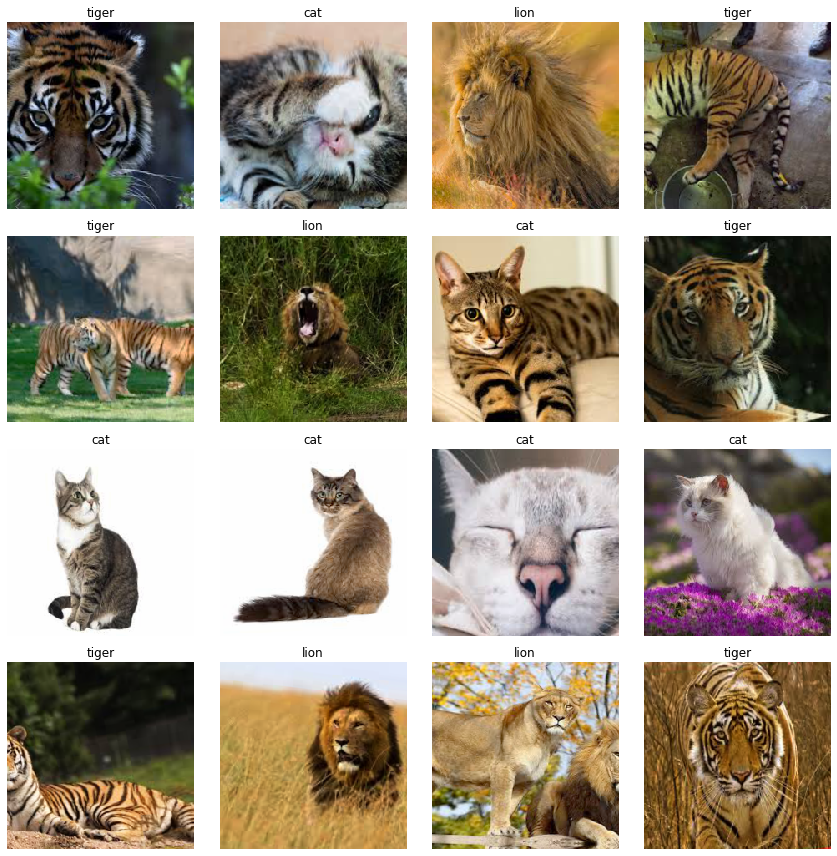

In [39]:
data.show_batch(rows=4, figsize=(12,12))


In [40]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['cat', 'lion', 'tiger'], 3, 384, 96)

data.classes က array အနေနဲ့ ထုတ်ကြည့်တာပါ data.c က classication လုပ်ရင် ဘယ်နှမျိုးရမလဲ ဆိုတာ ထုတ်ကြည့်တာပါ နောက်ပြီး train နဲ့ validation dataset တွေ ဘယ်လောက်ရှိလဲ ထုတ်ကြည့်တာပါ

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


CNN model ကိုသုံးပါမယ် convolutional neural network ထဲမှာမှ resnet50 ဆိုတဲ့ မော်ဒယ်ကို သုံးတာပါ နောက်ပြီး ဘယ်လောက်များ အမှားပါလဲ ဆိုတာ စစ်ဖို့အတွက် error_rate ဆိုတာ ထည့်ထားပါတယ် Transfer Learning ဖြစ်တဲ့အတွက် download လုပ်ပါတယ် အရင်က သူများ မော်ဒယ်တွမှာ train ထားတဲ့ weights တွေကို ဒေါင်းလုပ်လုပ်တာပါ သူများမော်ဒယ်ဆိုတာက ဒီက ကြောင်တို့ ကျားတို့အတွက် မဟုတ်ပါဘူး

In [42]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.668608,0.146228,0.020833,00:06
1,0.475674,0.039193,0.020833,00:06
2,0.324515,0.039726,0.020833,00:06
3,0.256521,0.043949,0.020833,00:06


ပြီးရင် fit လုပ်ပါတယ် fit_one_cycle() က နောက်ဆုံးပေါ်နည်းပညာပါ 
epoch ၄ ခါ လုပ်မှာပါ အချိန်က ဒီလောက် မြန်ပါတယ်တဲ့

In [0]:
learn.save('stage-1')


ဒါက နာမည်ကို အဆင့် ၁ လို့ ပေးပြီး သိမ်းထားတာပါ

In [0]:
learn.unfreeze()

မော်ဒယ်ကို ပြန်ပြီး fit လုပ်ဖို့ သို့မဟုတ် train ဖို့အတွက် unfreeze လုပ်ပါတယ်

In [45]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


learning rate ဘယ်လောက်က အကောင်းဆုံးလဲ သိချင်လို့ ရှာကြည့်တာပါ ဒါက နည်းရင်လည်း မကောင်း များရင်လည်း မကောင်းဘူးလေ

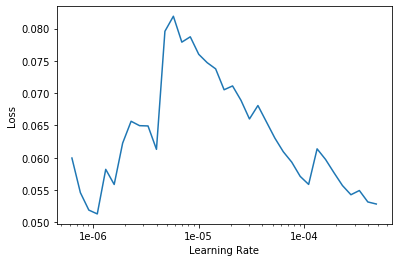

In [46]:
learn.recorder.plot()


ဒါက learning rate နဲ့ loss နဲ့ကို plot ချကြည့်တာပါ learning rate 1e-5 ကနေ 1e-4 ကြားမှာ learn လုပ်တဲ့ ပုံစံ အကောင်းဆုံးဖြစ်တဲ့အတွက် နောက်တစ်ခါ fit လုပ်တဲ့အခါ အဲ့ဒီ learning rate နှစ်ခုကြား min max ထားပြီး run ပါတယ်

In [47]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))



epoch,train_loss,valid_loss,error_rate,time
0,0.046804,0.023848,0.020833,00:07
1,0.055235,0.015315,0.000000,00:07


In [0]:
learn.save('stage-2')


ပြီးတော့ အဆင့် နှစ်နဲ့ သိမ်းပါတယ်

In [0]:
learn.load('stage-2');


ဒါက သိမ်းထားတာကို ပြန်ယူသုံးတာပါ

In [50]:
interp = ClassificationInterpretation.from_learner(learn)


ပြန်ယူပြီး ဒီ classify လုပ်တာကို interpret လုပ်ကြည့်ပါမယ်

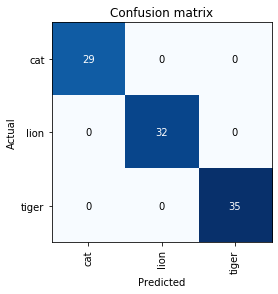

In [51]:
interp.plot_confusion_matrix()


confusion matrix ဆောက်ကြည့်တာပါ predicted နဲ့ actual ကို ဂရပ်ချထားတာပါ ဒီနေရာမှာ တကယ် ကြောင် ၂၉ ကောင်ရှိတာကို မိုဒယ်ကလည်း ၂၉ ကောင်လုံး မှန်အောင် ခန့်မှန်းနိုင်ပါတယ် လုံးဝကို မမှားတဲ့ classifier ပါ ဘာကြောင့်လဲဆိုတော့ ကြောင် ကျား ခြင်သေ့ဟာ သိသိသာသာ ခွဲခြား လွယ်နေတဲ့အတွက် အတိအကျ ခွဲခြားနိုင်တာ ဖြစ်ပါလိမ့်မယ်

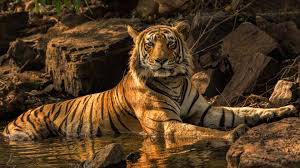

In [52]:
img = open_image(path/'tiger'/'00000043.jpg')
img

ကျားတစ်ကောင်ကို ထုတ်ကြည့်ပြီး img ထဲ ထည့်ထားပါတယ်

In [53]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tiger

ပြီးတော့ prediction ခန့်မှန်းခိုင်းပါတယ် အဖြေကလည်း ကျားပါတဲ့